In [9]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
def load_wine_data(path_to_dir, filename, csv_separator):
    csv_path = os.path.join(path_to_dir, filename)
    return pd.read_csv(csv_path, sep=csv_separator)
#os.path.dirname(path) return the parent directory of the given path
PARENT_DIR = os.path.dirname(os.getcwd())
WINE_DIR = os.path.join(PARENT_DIR, "Data set")
print(PARENT_DIR)
print(WINE_DIR)

/home/hl271/ML/WineQuality
/home/hl271/ML/WineQuality/Data set


In [11]:
df_red_wine = load_wine_data(WINE_DIR, "winequality-red.csv", ";")

In [12]:
%matplotlib inline

# Visualize dataset before scaling

In [13]:
np_red_features = df_red_wine.columns.values
np_red_features_reshaped = np_red_features.reshape(6, 2)
np_red_features_reshaped

array([['fixed acidity', 'volatile acidity'],
       ['citric acid', 'residual sugar'],
       ['chlorides', 'free sulfur dioxide'],
       ['total sulfur dioxide', 'density'],
       ['pH', 'sulphates'],
       ['alcohol', 'quality']], dtype=object)

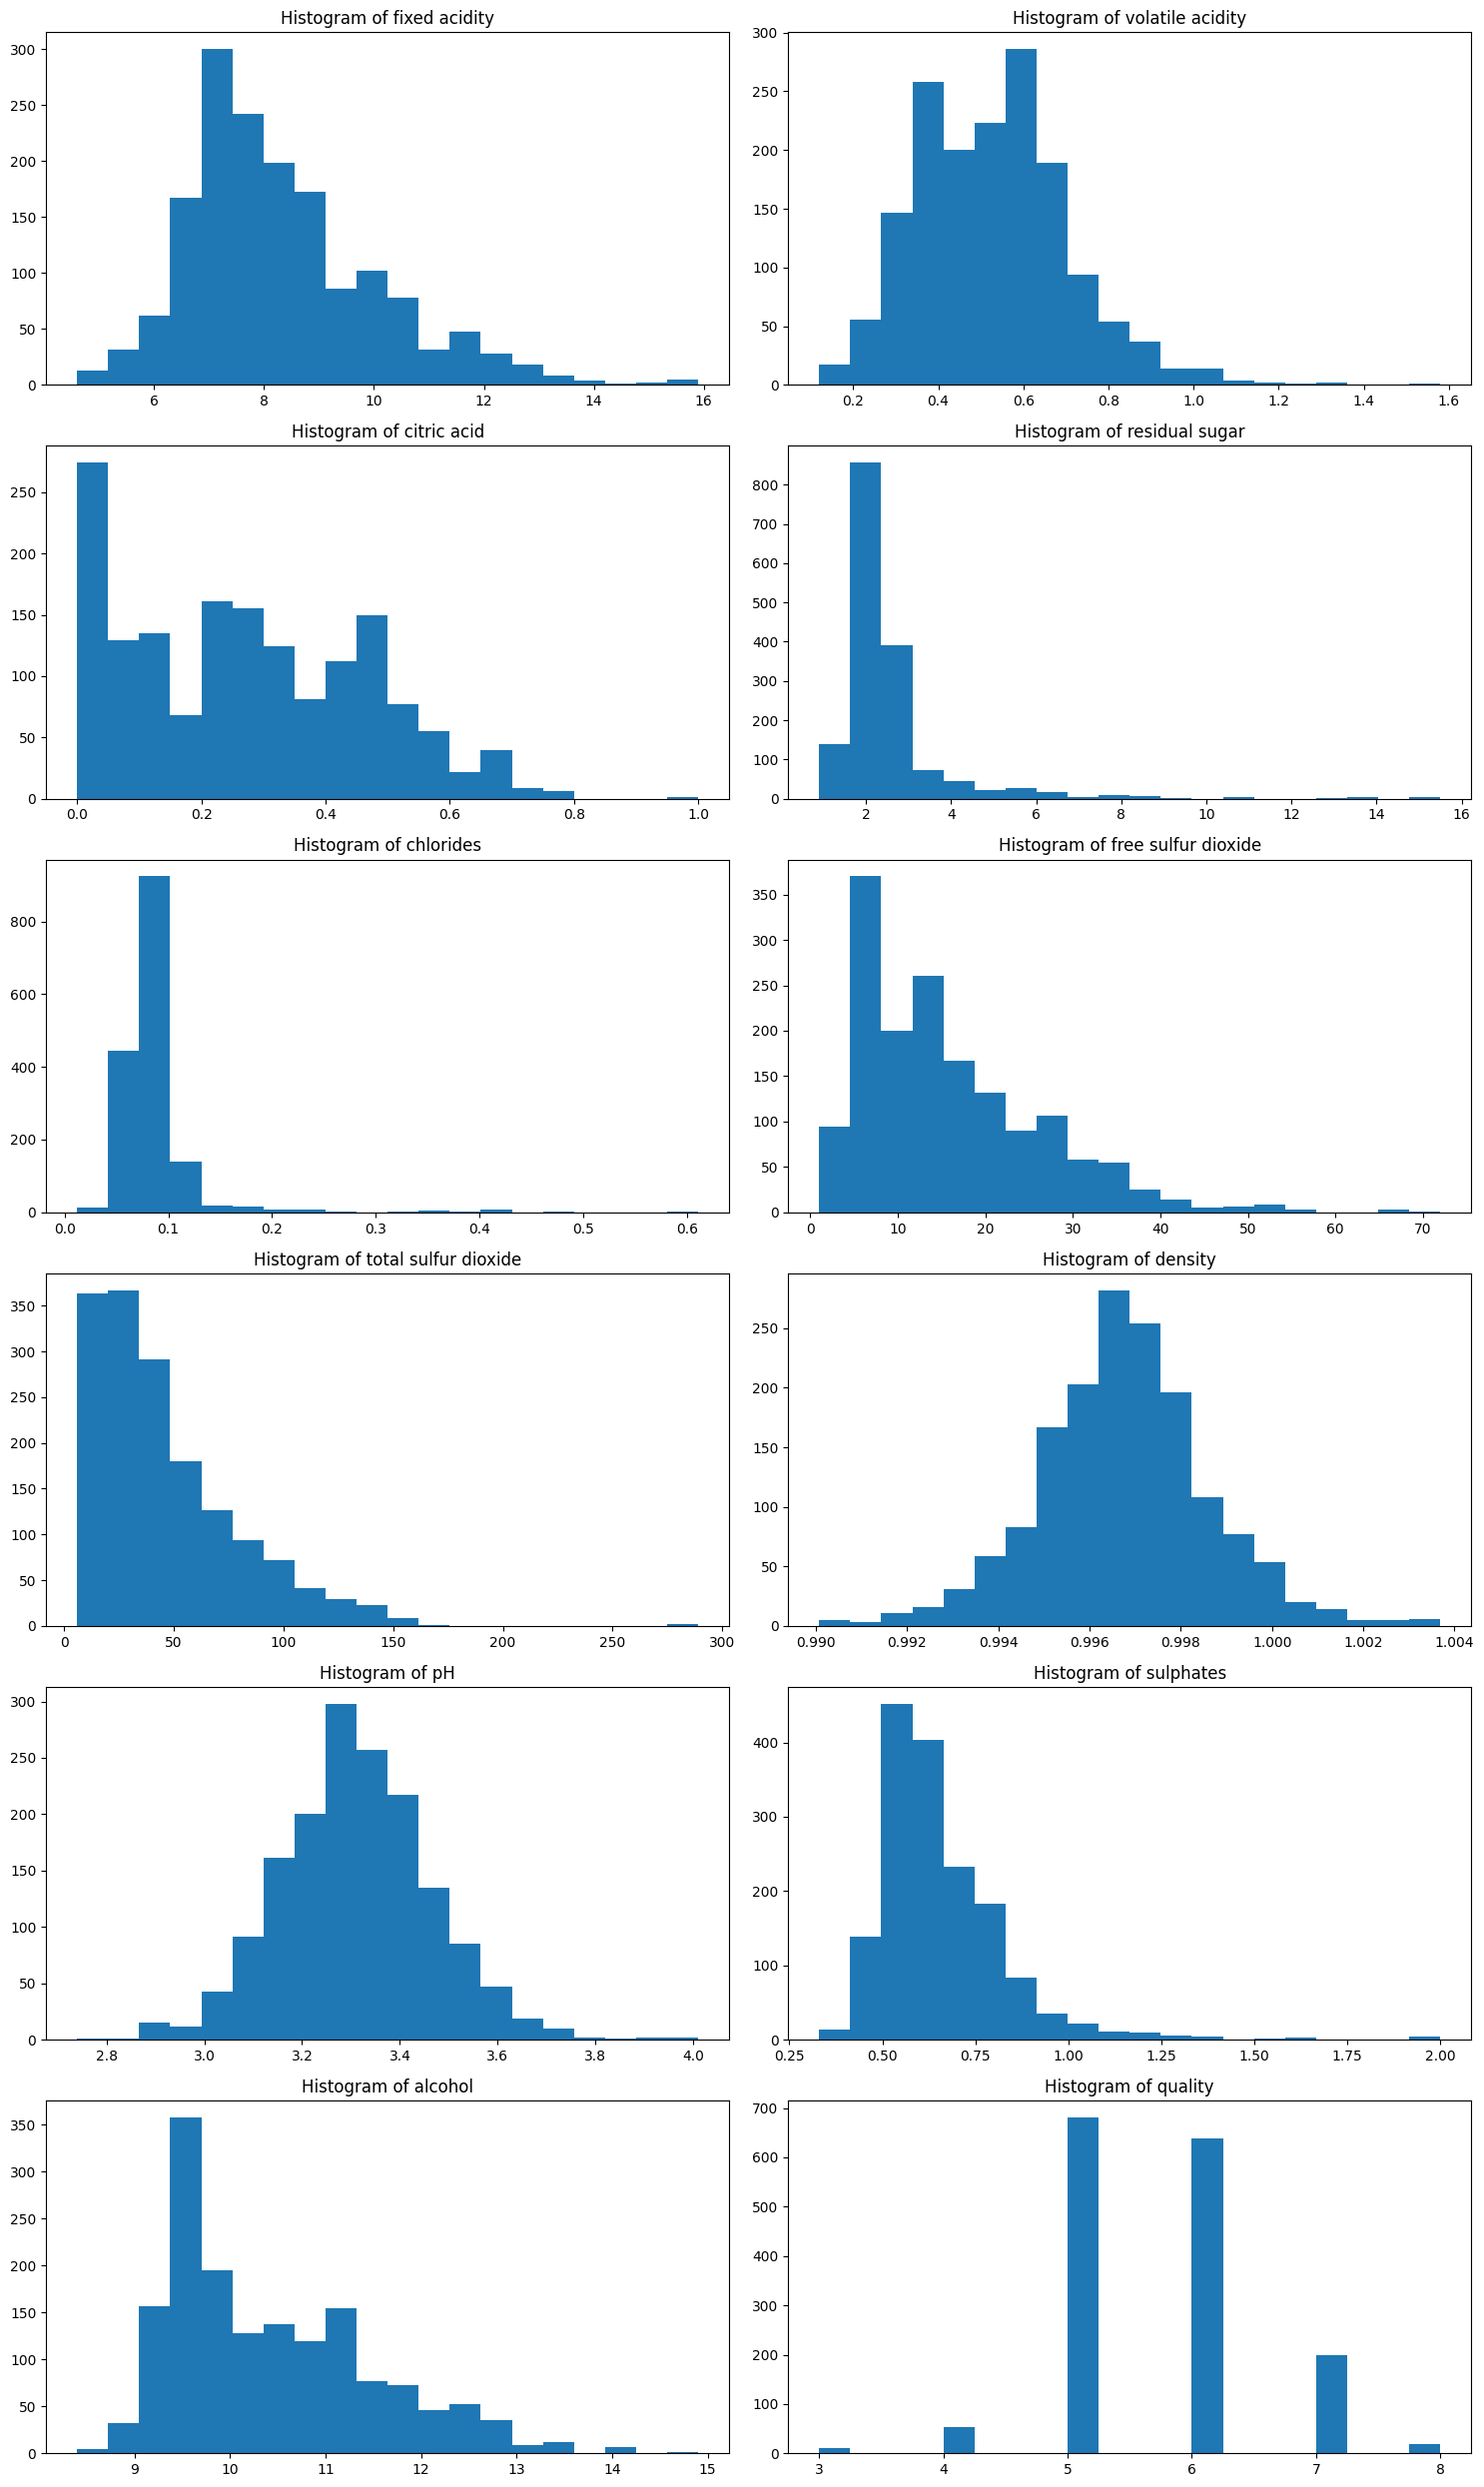

In [14]:
fig, axes = plt.subplots(6, 2, figsize=(15, 25))
for i in range(6):
    for j in range(2):
        feature = np_red_features_reshaped[i, j]
        axes[i, j].hist(df_red_wine[feature], bins=20)
        axes[i, j].set_title(f"Histogram of {np_red_features_reshaped[i, j]}")
fig.tight_layout()

# Feature Scaling

## Normalization 

- scale the vector to have a length of 1 i.e., a `unit norm`
- There are different ways to define “length” such as as l1 or l2-normalization. 

> More to learn on Lp Norm here: [Youtube](https://youtu.be/NKuLYRui-NU)

In [15]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer(norm="l2")

In [20]:
normalizer.fit(df_red_wine)
df_red_wine_normalized = normalizer.transform(df_red_wine)
df_red_wine_normalized = pd.DataFrame(df_red_wine_normalized, columns=df_red_wine.columns)
df_red_wine_normalized

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.193478,0.018302,0.000000,0.049677,0.001987,0.287602,0.888952,0.026088,0.091771,0.014642,0.245769,0.130728
1,0.106989,0.012071,0.000000,0.035663,0.001344,0.342913,0.919006,0.013673,0.043893,0.009327,0.134422,0.068583
2,0.134949,0.013149,0.000692,0.039793,0.001592,0.259517,0.934261,0.017249,0.056402,0.011246,0.169551,0.086506
3,0.173611,0.004340,0.008681,0.029452,0.001163,0.263517,0.930059,0.015470,0.048983,0.008991,0.151910,0.093006
4,0.193478,0.018302,0.000000,0.049677,0.001987,0.287602,0.888952,0.026088,0.091771,0.014642,0.245769,0.130728
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,0.110445,0.010688,0.001425,0.035628,0.001603,0.570040,0.783805,0.017723,0.061457,0.010332,0.187044,0.089069
1595,0.089586,0.008351,0.001518,0.033405,0.000941,0.592177,0.774385,0.015110,0.053448,0.011540,0.170061,0.091104
1596,0.122232,0.009895,0.002522,0.044624,0.001475,0.562655,0.776076,0.019319,0.066354,0.014551,0.213421,0.116411
1597,0.105248,0.011506,0.002141,0.035677,0.001338,0.570835,0.784898,0.017758,0.063684,0.012665,0.181954,0.089193


# Visualize dataset after scaling

Text(0.5, 0.98, 'All rescaled features')

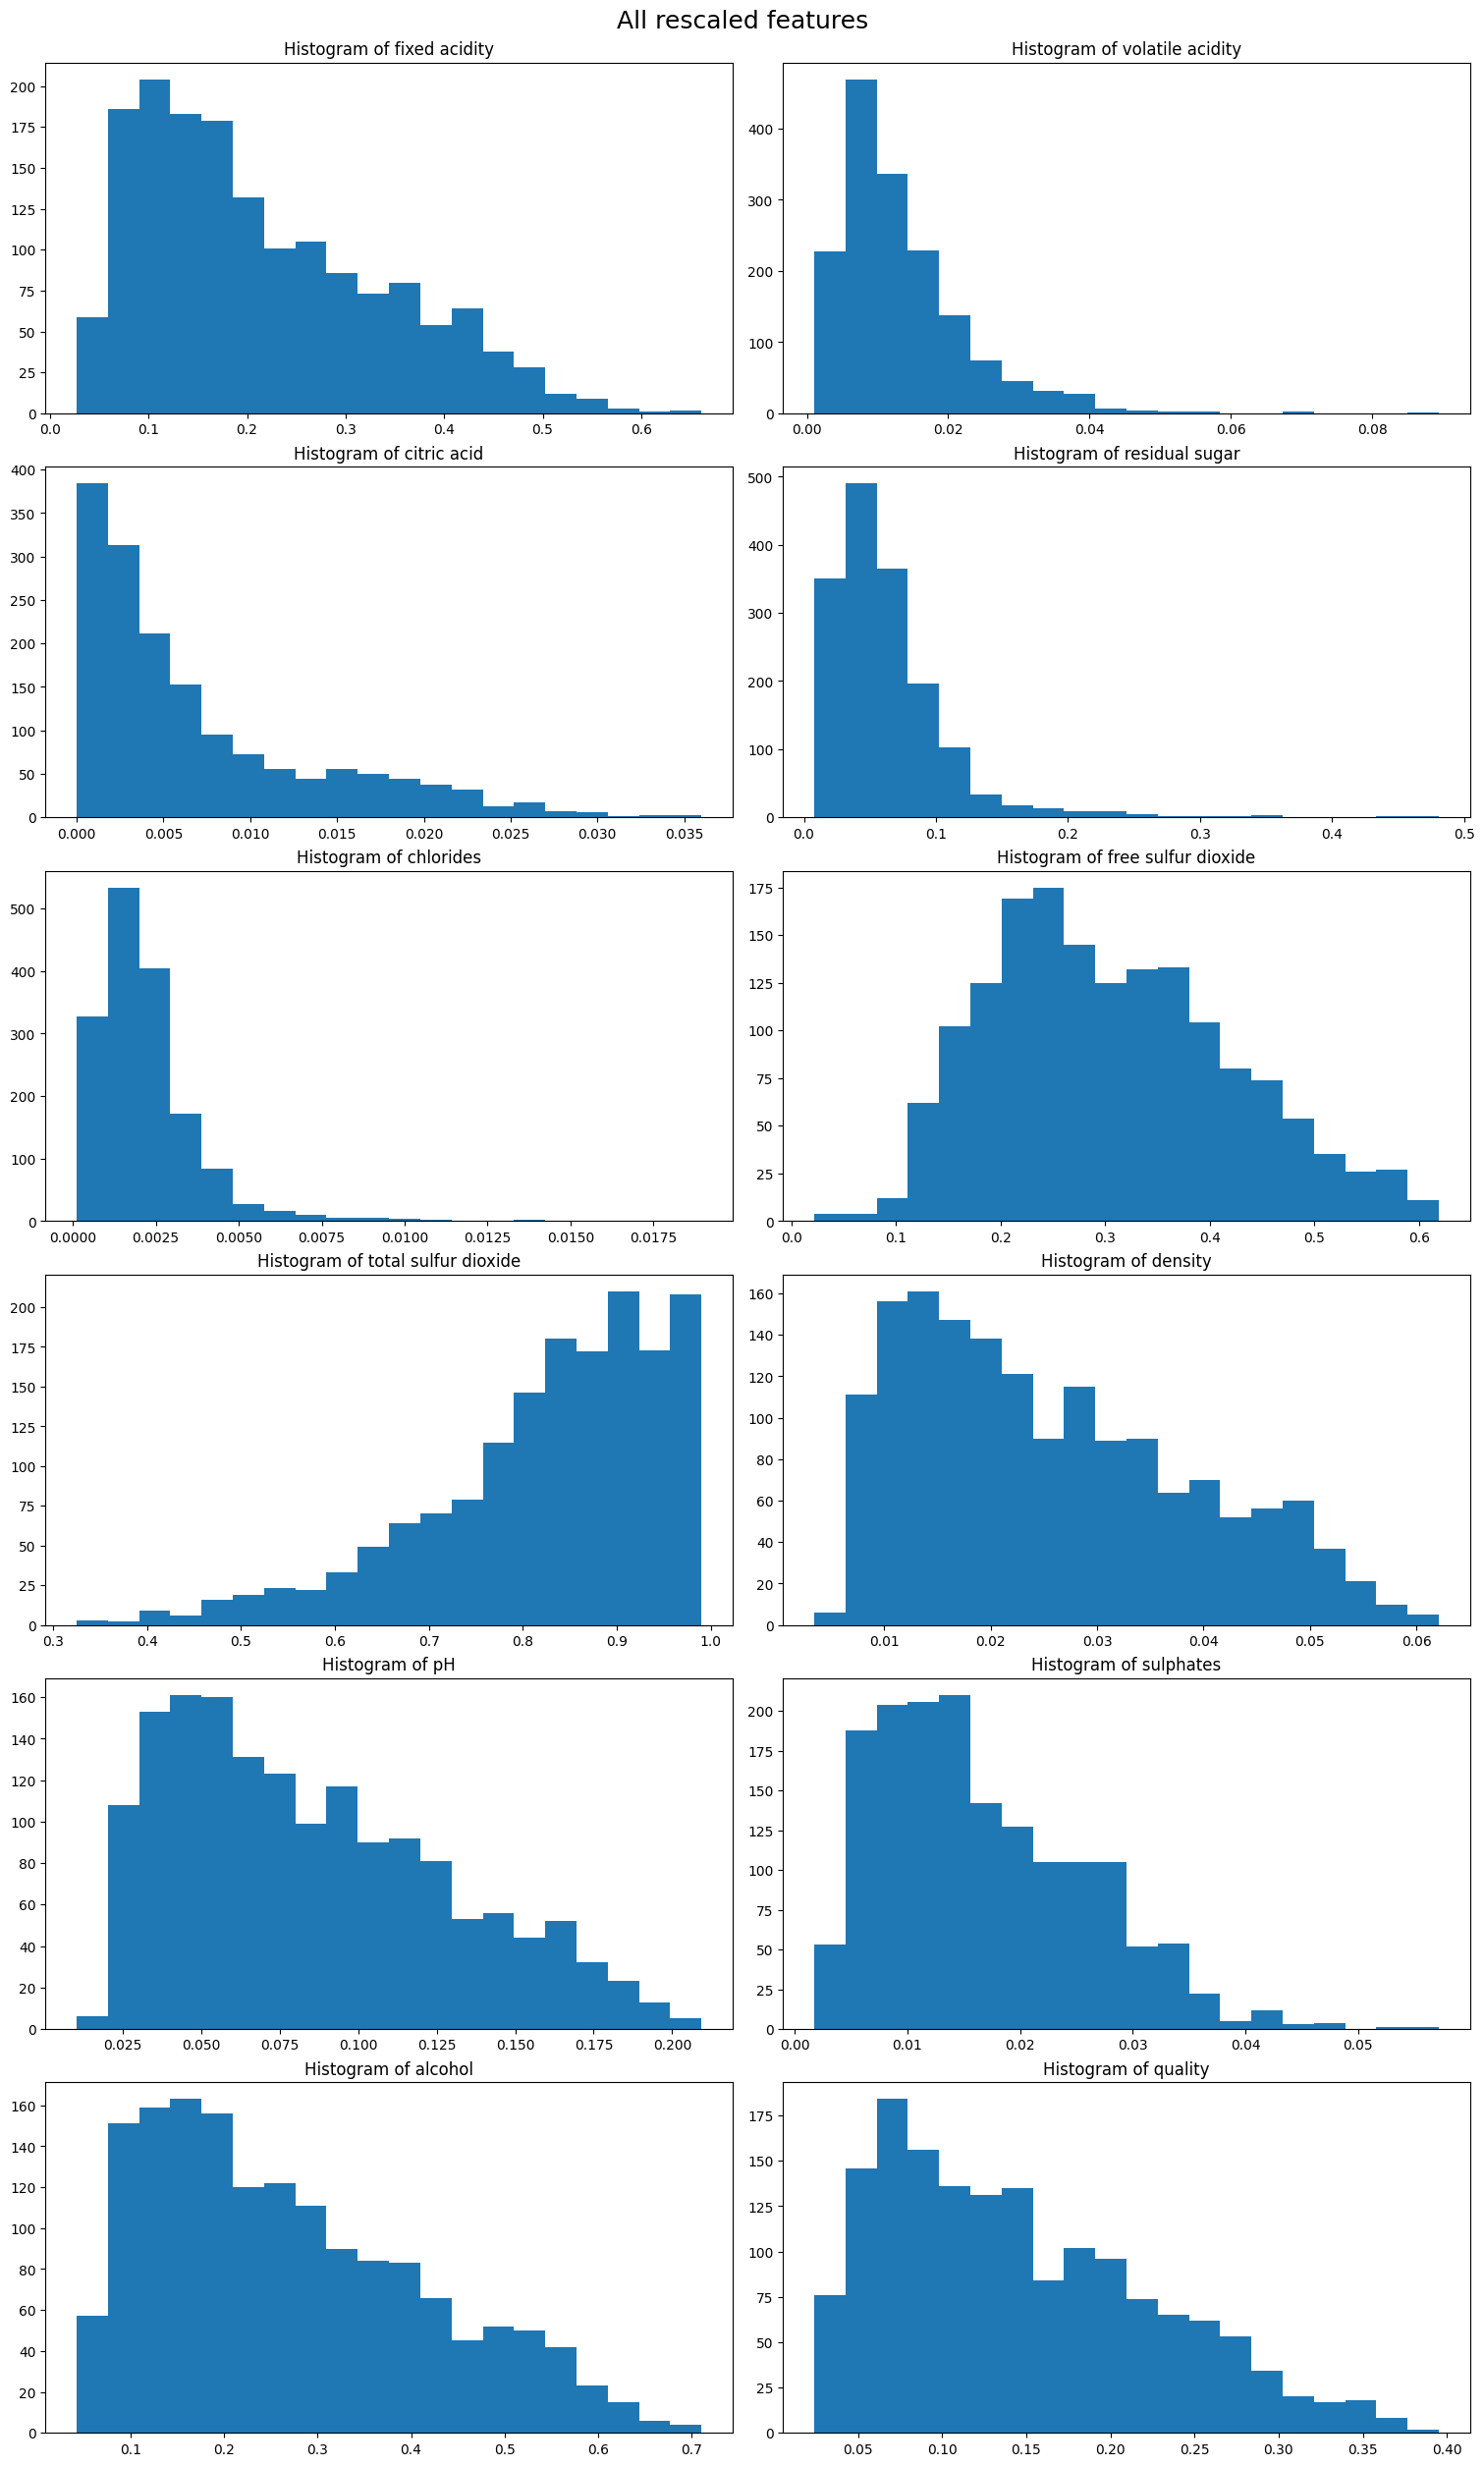

In [25]:
fig, axes = plt.subplots(6, 2, figsize=(15, 25), constrained_layout=True)
for i in range(6):
    for j in range(2):
        feature = np_red_features_reshaped[i, j]
        axes[i, j].hist(df_red_wine_normalized[feature], bins=20)
        axes[i, j].set_title(f"Histogram of {np_red_features_reshaped[i, j]}")
fig.suptitle("All rescaled features", fontsize=18)

Text(0.5, 0.98, 'Feature scaling: before and after')

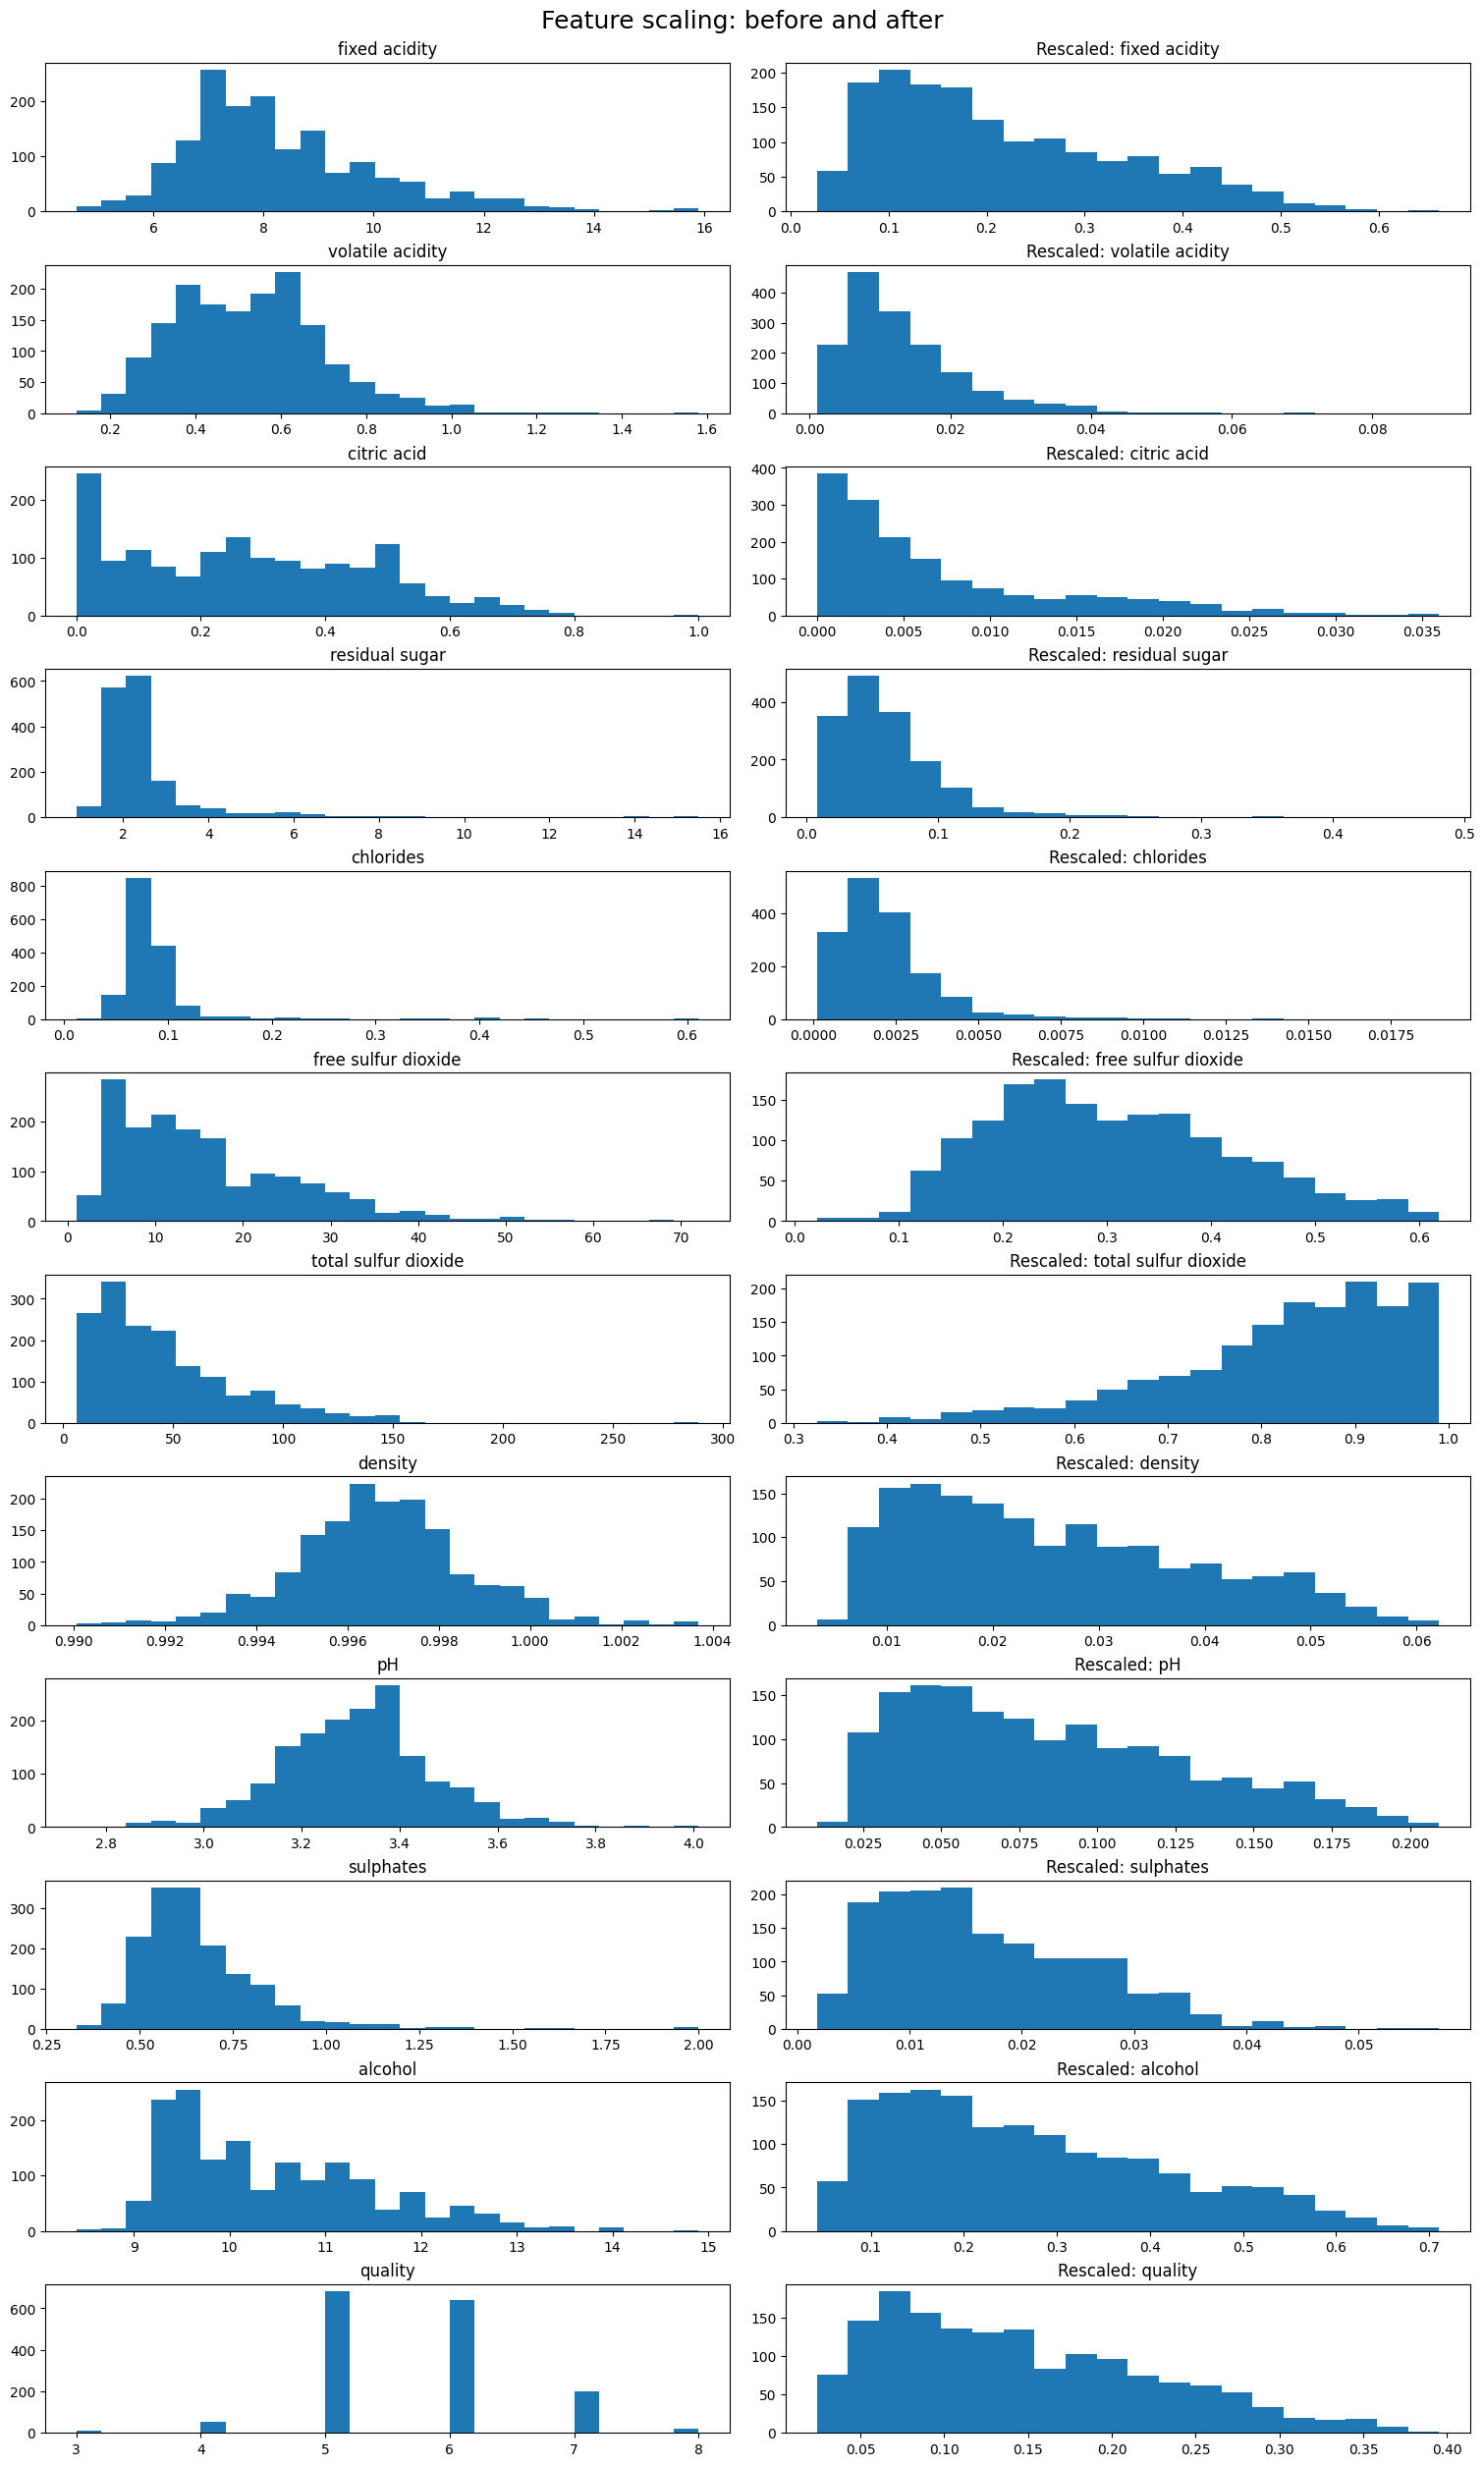

In [27]:
fig, axes = plt.subplots(12, 2, figsize=(15, 25), constrained_layout=True)
for i in range(12):
    feature = np_red_features[i]
    axes[i, 0].hist(df_red_wine[feature], bins=25)
    axes[i, 1].hist(df_red_wine_normalized[feature], bins=20)
    axes[i, 0].set_title(f"{np_red_features[i]}")
    axes[i, 1].set_title(f"Rescaled: {np_red_features[i]}")
fig.suptitle("Feature scaling: before and after", fontsize=18)